In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json

%matplotlib inline

In [81]:
folder_names = [r"/home/justin/Documents/rlkit/output/sawyer-reach-sim-2d/2019_05_12_22_18_53",
r"/home/justin/Documents/rlkit/output/sawyer-reach-sim-2d/2019_05_12_22_19_01"
               ]





In [82]:
def process_data(fname):
    file_name = fname + "/progress.csv"
    data = pd.read_csv(file_name)
    print(data.columns)
    
    json_dict = json.load(open(fname + "/variant.json"))
    n_tasks = json_dict["env_params"]["n_tasks"]
    kl_lambda = json_dict["algo_params"]["kl_lambda"]
    label = "NTasks: {} | KL-Lambda: {}".format(n_tasks, kl_lambda)
    
    data["info"] = label
    return data
    
def plot(data, column_name):
    x = data[[column_name, "info"]]
    plt.figure(figsize=(12,8))
    sns.lineplot(x = x.index, y = x[column_name], hue=x["info"])

In [83]:
all_data = []
for fname in folder_names:
    all_data.append(process_data(fname))

Index(['Epoch Time (s)', 'KL Loss', 'AverageFinalReturn_all_train_tasks',
       'V Predictions Mean', 'Policy Loss', 'V Predictions Std', 'VF Loss',
       'Q Predictions Mean', 'Number of train steps total', 'Z mean train',
       'Epoch', 'AverageTrainReturn_all_train_tasks', 'TrainIndices',
       'Number of rollouts total', 'Stddev_AverageFinalReturn_all_test_tasks',
       'V Predictions Min', 'Total Train Time (s)',
       'Stddev_AverageFinalReturn_all_train_tasks', 'Log Pis Mean',
       'AverageFinalReturn_all_test_tasks', 'KL Divergence',
       'AverageReturn_all_test_tasks', 'AverageReturn_all_train_tasks',
       'TrainFinalReturns', 'Train Time (s)', 'Z variance eval',
       'Policy mu Std', 'Policy log std Std', 'Policy log std Max',
       'Policy mu Max', '(Previous) Eval Time (s)', 'Policy mu Mean',
       'V Predictions Max', 'Q Predictions Std', 'Number of env steps total',
       'QF Loss', 'Stddev_AverageReturn_all_test_tasks', 'Policy mu Min',
       'Log Pis M

/home/justin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


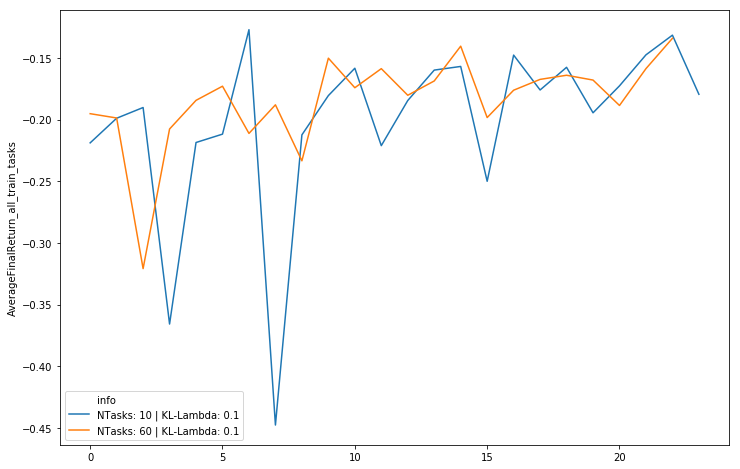

In [86]:
plot(pd.concat(all_data), "AverageFinalReturn_all_train_tasks")

/home/justin/.local/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


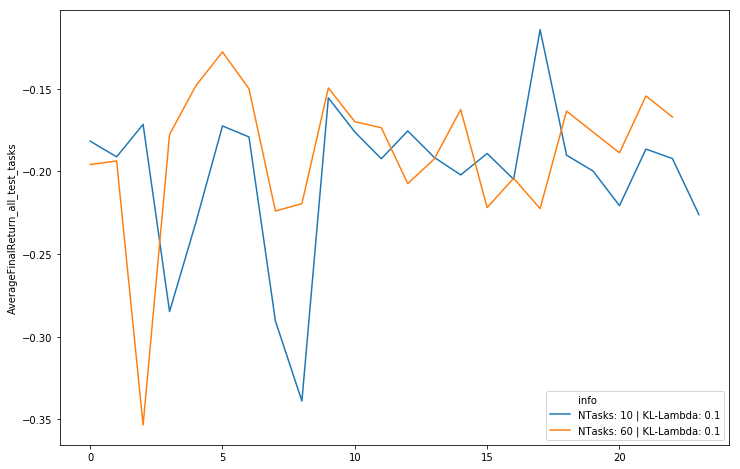

In [85]:
plot(pd.concat(all_data), "AverageFinalReturn_all_test_tasks")